In [1]:
import numpy as np
import iris
from iris.util import unify_time_units
from iris.experimental.equalise_cubes import equalise_attributes
import datetime as dt
import eots
import iris.quickplot as qplt

In [2]:
cubelist = iris.cube.CubeList()
base_year = dt.datetime(year=1979,month=1,day=1)
for year in range(1979, 2018):
    infile = '/home/nick/Downloads/pinelopi/stat_trs_scl_pos.2day_addT63vor_%s.tcident.lmask.tstep_1.nc' %str(year)
    tden = iris.load_cube(infile,'Track Density')
    this_year = dt.datetime(year=year,month=1,day=1)
    t_coord = iris.coords.DimCoord((this_year-base_year).days,standard_name='time',units='Days since 1979-01-01 00:00:00')
    tden = iris.util.new_axis(tden)
    tden.add_dim_coord(t_coord,0)
    cubelist.append(tden)

In [3]:
equalise_attributes(cubelist)
unify_time_units(cubelist)
cube = cubelist.concatenate_cube()
cube.coord('latitude').units='degrees'
cube.coord('longitude').units='degrees'

In [5]:
eot_patt_cube,eot_ts_cube,eot_lon_cube,eot_lat_cube = eots.compute_eot(cube,[300,350,0,60])

Track Density / (1)                 (time: 39; latitude: 32; longitude: 27)
     Dimension coordinates:
          time                           x             -              -
          latitude                       -             x              -
          longitude                      -             -              x
     Attributes:
          title: Tracking Statistics: number densities and mean attributes
EOTs: EOT 1 base point is 12.124187469482422N, 324.375 E with correlation 0.8561589949751807
EOTs: EOT 1 explains 73.30082246769113% of the variance of the area-averaged timeseries.
EOTs: EOT 2 base point is 32.64199447631836N, 305.625 E with correlation 0.7162009248279135
EOTs: EOT 2 explains 13.695176915188478% of the variance of the area-averaged timeseries.
EOTs: EOT 3 base point is 41.96821975708008N, 316.875 E with correlation 0.6698696364451484
EOTs: EOT 3 explains 5.835224654450001% of the variance of the area-averaged timeseries.


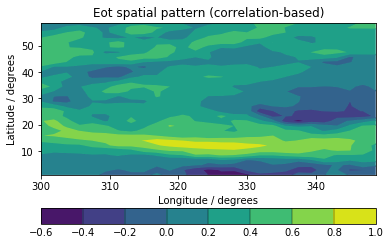

In [8]:
qplt.contourf(eot_patt_cube[0,:,:])